In [1]:
pwd

'/Users/munaigboko/Downloads'

In [2]:
import pandas as pd # Everything to do with dataframes, tables, csvs
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import reciprocal, uniform
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, plot_roc_curve, precision_recall_curve
import matplotlib as mpl

In [3]:
path = '~/Downloads/archive/'

In [4]:
df_train = pd.read_csv(path + 'KDDTrain.txt')
df_test = pd.read_csv(path + 'KDDTest.txt')

In [5]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df_train.info() # df_train has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
df_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [9]:
print("Number of entries in df_train:", len(df_train))
print("Number of entries in df_test:", len(df_test))

Number of entries in df_train: 125973
Number of entries in df_test: 22544


## Clean up the dataset
- Take care of all non-numerical and categorical data --> one-hot encoding

In [10]:
protocol_type = pd.get_dummies(df_train.protocol_type)
service = pd.get_dummies(df_train.service)
flag = pd.get_dummies(df_train.flag)
#class_ = pd.get_dummies(df_train['class'])

cleanup_class = {
                "class": {
                    "anomaly": 1,
                    "normal": 0
                    }
                }

df_train.replace(cleanup_class, inplace=True)
df_test.replace(cleanup_class, inplace=True)

In [11]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [12]:
# Clean up our training dataframe
df_train = pd.concat([df_train, protocol_type], axis = 1)
df_train = pd.concat([df_train, service], axis = 1)
df_train = pd.concat([df_train, flag], axis = 1)

# Drop the categorical data
df_train = df_train.drop(columns = ['protocol_type', 'service', 'flag'])

In [13]:
df_train.info() # Should have only integer/float dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, duration to SH
dtypes: float64(15), int64(24), uint8(84)
memory usage: 47.6 MB


In [14]:
df_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
protocol_type = pd.get_dummies(df_test.protocol_type)
service = pd.get_dummies(df_test.service)
flag = pd.get_dummies(df_test.flag)

# Clean up our testing dataframe
df_test = pd.concat([df_test, protocol_type], axis = 1)
df_test = pd.concat([df_test, service], axis = 1)
df_test = pd.concat([df_test, flag], axis = 1)

# Drop the categorical data
df_test = df_test.drop(columns = ['protocol_type', 'service', 'flag'])

In [16]:
df_test.info() # Should have only integer/float dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Columns: 117 entries, duration to SH
dtypes: float64(15), int64(24), uint8(78)
memory usage: 8.4 MB


In [17]:
df_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Drop any columns not contained in **both** df_train and df_test

In [18]:
# Get the sets of columns in both dataframes
df_train_columns = set(df_train.columns)
df_test_columns = set(df_test.columns)

# Gets the columns that are not contained in both dataframes
columns_to_drop = df_train_columns.difference(df_test_columns)

# Drops those columns from the training dataframe
df_train = df_train.drop(columns = columns_to_drop)

In [19]:
df_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Machine Learning
- In this section, we'll be running different machine learning algorithmsfrom sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
y_train = list(df_train['class'])
df_train = df_train.drop(columns = ['class']) # Make sure your prediction dataframe does NOT have the truth labels

In [23]:
lr = lr.fit(df_train, y_train) # fit the data

In [24]:
y_test = list(df_test['class'])
df_test = df_test.drop(columns = ['class']) # Make sure your prediction dataframe does NOT have the truth labels

In [25]:
probs = lr.predict_proba(df_test)
preds = probs[:,1] # Store the predictions

In [26]:
preds

array([0.98210609, 0.95085008, 0.26247153, ..., 0.02399643, 0.02508974,
       0.69684644])

In [27]:
preds[0:5]

array([0.98210609, 0.95085008, 0.26247153, 0.24619094, 0.17815734])

In [28]:
y_test[0:5]

[1, 1, 0, 1, 1]

In [29]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [30]:
threshold

array([1.99962717, 0.99962717, 0.99961718, ..., 0.00684664, 0.00682644,
       0.00678495])

In [31]:
print(threshold[100], tpr[100], fpr[100])

0.9100714081706125 0.4045040130912491 0.03768921841210998


### Example 
true_class = [0, 0, 1, 1, 0]
predictions = [0.05, 0.15, 0.85, 0.95, 0.1]

thresholds = [0, 0.2, 0.5, 0.9, 1]

At a threshold of 0 --> my binary predctions become this
[1, 1, 1, 1, 1]
fpr = 100%
tpr = 100%

At a threshold of 0.2 --> my binary predctions become this
[0, 0, 1, 1, 0]
fpr = 0%
tpr = 100%

At a threshold of 0.5 --> my binary predctions become this
[0, 0, 1, 1, 0]
fpr = 0%
tpr = 100%


At a threshold of 0.9 --> my binary predctions become this
[0, 0, 0, 1, 0]
fpr = 0%
tpr = 50%

At a threshold of 1 --> my binary predctions become this
[0, 0, 0, 0, 0]
fpr = 0%
tpr = 0%

In [32]:
def get_optimal_threshold(fprs, tprs, thresholds):
    """
    For a given series of fprs, tprs, and thresholds, find the value closest to top left corner.
    Returns the optimal tpr, fpr, and threshold
    """
    distances = []
    for i in range(len(tprs)):
        x = fprs[i]
        y = 1 - tprs[i]
        dist = np.sqrt(x ** 2 + y ** 2)
        distances.append(dist)
    op_idx = np.argmin(distances)
    op_fpr = fprs[op_idx]
    op_tpr = tprs[op_idx]
    op_threshold = thresholds[op_idx]
    return op_fpr, op_tpr, op_threshold

def get_binary_predictions(y_pred, threshold):
    """
    For a given threshold, apply it to the predicted probabilites.

    Parameters:
        y_pred (np array): array of probabilities outputted from model
        threshold (np array): the threshold above which to predict a POSITIVE outcome
    """

    y_pred_binary = y_pred.copy()
    y_pred_binary[y_pred > threshold] = 1
    y_pred_binary[y_pred <= threshold] = 0
    return y_pred_binary

def perf_measure(y_actual, y_hat):
    """
    Create simple stats: true positive, false positive, true negative, false negative
    """

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1

    return (TP, FP, TN, FN)

def plot_roc(fpr, tpr, title = "ROC Curve"):
    #title="ROC Curve"
    op_fpr, op_tpr, op_thresh = get_optimal_threshold(fpr, tpr, threshold)
    plt.figure(figsize=(15, 15))
    plt.title(title, fontsize=25)

    curve_auc = auc(fpr, tpr)
    plt.scatter(op_fpr, op_tpr, color = "black", s = 150, zorder=2)
    
    plt.plot(fpr, tpr, lw = 3, label=("AUC = %0.2f") % curve_auc,zorder=1)  # make main plot
    

    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
    plt.legend(loc="lower right", prop={'size': 25})
    plt.xlabel("False Positive Rate", fontsize=25)
    plt.ylabel("True Positive Rate", fontsize=25)
    plt.show()
    

def plot_pr(precision, recall, title = "Precision-Recall Curve"):
    #title="ROC Curve"
    plt.figure(figsize=(15, 15))
    plt.title(title, fontsize=25)

    curve_auc = auc(recall, precision)
    
    plt.plot(recall, precision, lw = 3, label=("AUC = %0.2f") % curve_auc,zorder=1)  # make main plot

    plt.legend(loc="lower right", prop={'size': 25})
    plt.xlabel("Recall", fontsize=25)
    plt.ylabel("Precision", fontsize=25)
    plt.show()

def f_importances(coef, names, top=-1):
    imp = coef
    zip_lis = sorted(zip(imp, names))
    zip_lis.reverse()
    
    sorted_names = []
    for tup in zip_lis:
        sorted_names.append(tup[1])
        
    imp, names = [[i for i, j in zip_lis], [j for i, j in zip_lis]]
    # Show all features
    if top == -1:
        top = len(names)
    mpl.rcParams["xtick.labelsize"] = 20
    mpl.rcParams["ytick.labelsize"] = 20
    plt.figure(figsize=(15, 15))
    plt.barh(range(top), imp[0:top], align="center")
    plt.yticks(range(top), names[0:top])
    plt.gca().invert_yaxis()
    plt.show()
    
    return sorted_names

In [33]:
# Obtain the optimal threshold that maximizes the tpr and minimizes the fpr (at the operating point)
op_fpr, op_tpr, op_thresh = get_optimal_threshold(fpr, tpr, threshold)

# Obtain the binary predictions using the optimal threshold
y_pred_binary = get_binary_predictions(preds, op_thresh)

In [34]:
op_fpr, op_tpr, op_thresh

(0.20502522912161467, 0.7550066235486635, 0.15469257137855094)

In [35]:
preds

array([0.98210609, 0.95085008, 0.26247153, ..., 0.02399643, 0.02508974,
       0.69684644])

In [36]:
y_pred_binary

array([1., 1., 1., ..., 0., 0., 1.])

In [37]:
print("Accuracy: " + str(((sum(y_pred_binary == y_test)) / len(y_test)) * 100) + "%")

Accuracy: 77.21788502484031%


In [38]:
# Obtain the true positives, false positives, true negatives, and false negatives
tp, fp, tn, fn = perf_measure(list(y_test), list(y_pred_binary))

In [39]:
# Display the statistics at the operative point 
print('Sensitivity = {}'.format(tp / (tp + fn)))
print('Specificity = {}'.format(tn / (tn + fp)))
print('NPV = {}'.format(tn / (tn + fn)))
print('PPV = {}'.format(tp / (tp + fp)))

Sensitivity = 0.7549286994467389
Specificity = 0.7949747708783853
NPV = 0.7105384261389783
PPV = 0.8295230756057882


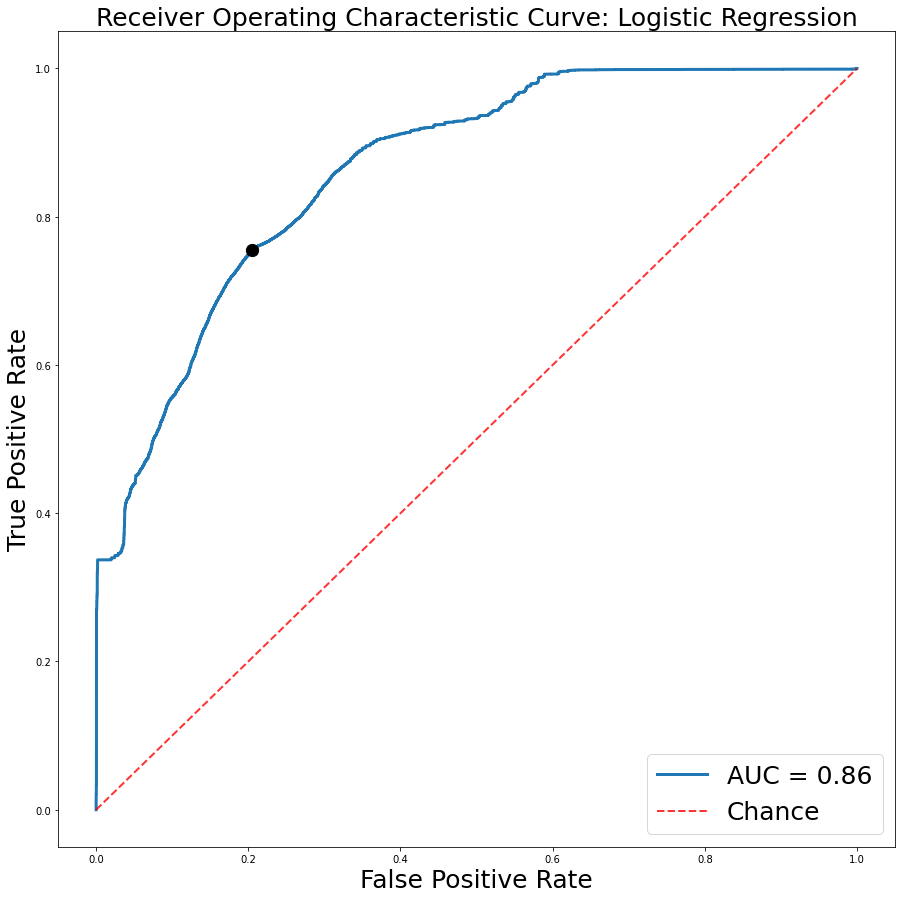

In [40]:
plot_roc(fpr, tpr, title = "Receiver Operating Characteristic Curve: Logistic Regression")

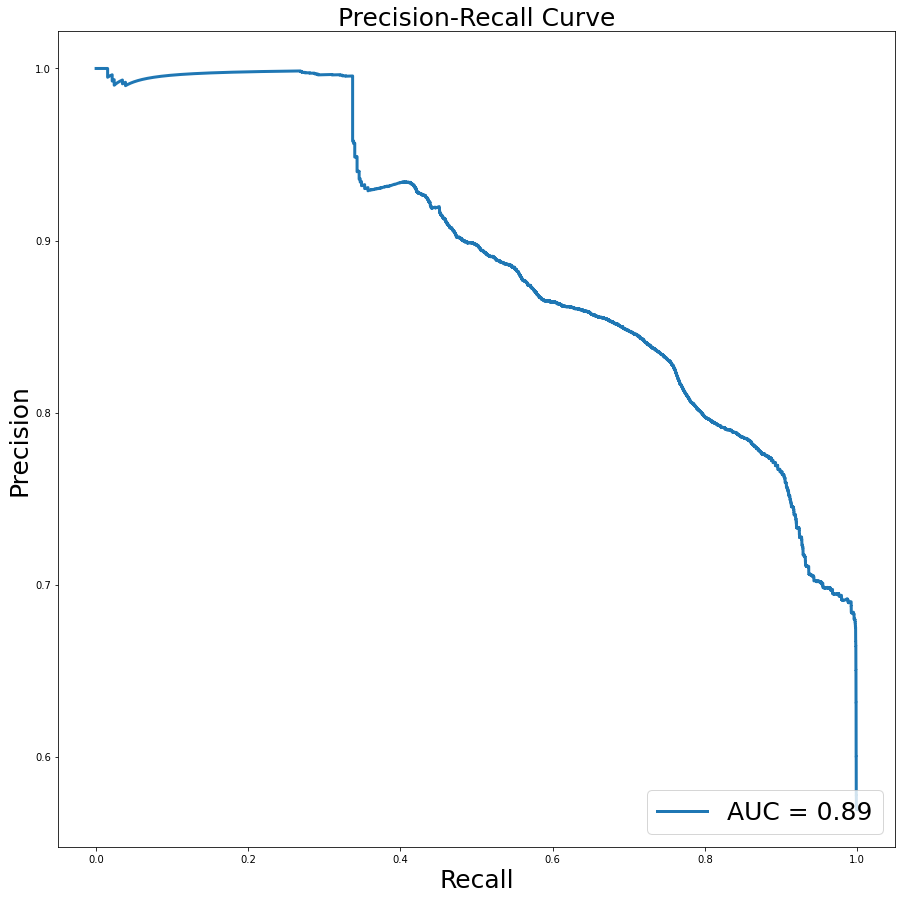

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
plot_pr(precision, recall)

In [42]:
lr.coef_[0]

array([-2.41678058e-05,  2.29308185e-08,  9.53793449e-08,  2.29956435e-08,
        5.65316414e-06, -1.45843930e-08, -1.10920567e-05, -7.50269609e-08,
       -8.30742006e-05, -8.08235941e-05, -2.29904478e-07, -3.39820996e-07,
       -9.16716605e-05, -3.56169902e-06, -6.22447155e-08, -1.04698213e-06,
        0.00000000e+00, -2.23945603e-09, -1.19771725e-06,  1.31503967e-02,
       -5.69586141e-04,  6.11551029e-05,  6.10591281e-05,  1.59106866e-05,
        1.60912285e-05, -8.56180856e-05,  6.70881614e-06, -6.99596598e-06,
        4.68223647e-03, -1.94552933e-02, -7.60378451e-05,  7.93938757e-06,
        4.93226777e-06,  1.98476628e-06,  6.08261850e-05,  6.14703833e-05,
        1.50911964e-05,  1.58255499e-05,  1.21381163e-05, -9.90308843e-06,
       -1.96295050e-05, -4.30440523e-07, -1.38124860e-07,  1.52161793e-06,
        7.54008766e-07,  1.25216455e-06,  1.31975150e-06,  9.62645870e-07,
        9.96390516e-07,  9.19289187e-07,  9.48361983e-07,  8.50621391e-07,
       -1.71985238e-05,  

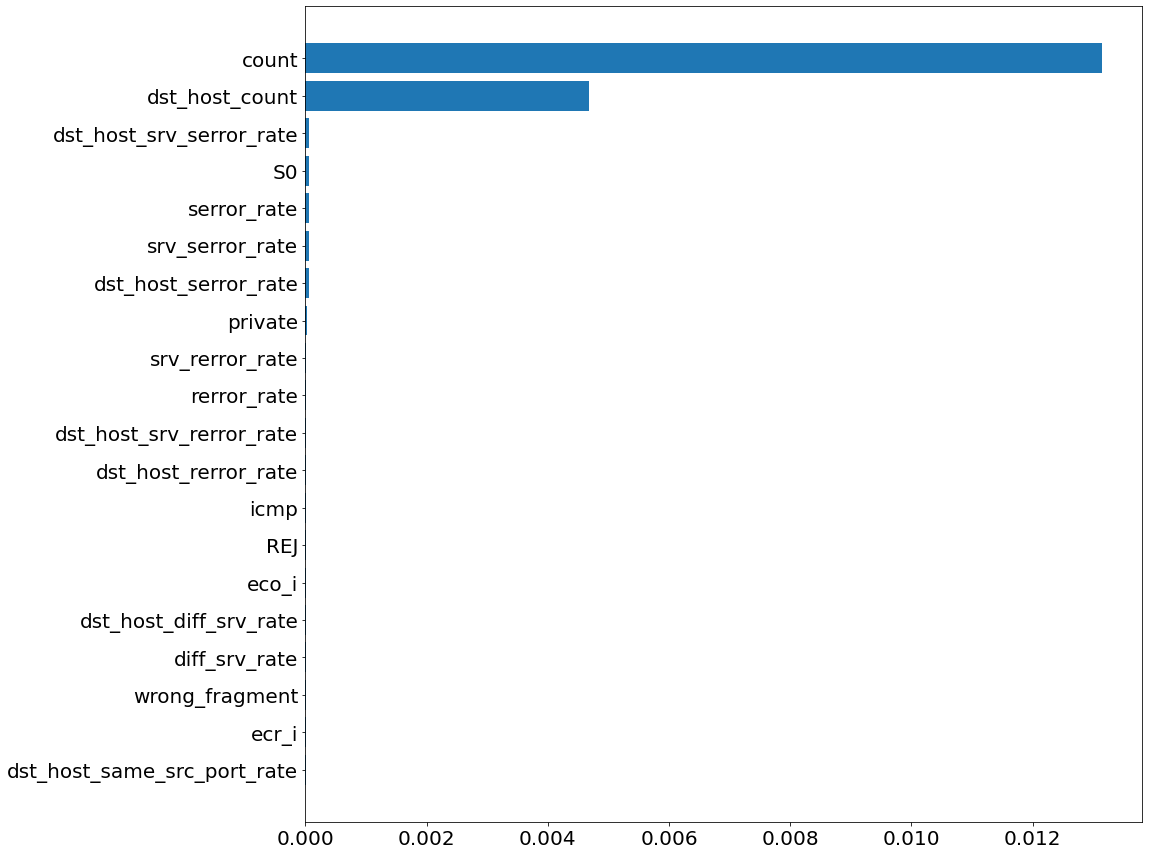

['count',
 'dst_host_count',
 'dst_host_srv_serror_rate',
 'S0',
 'serror_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'private',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'icmp',
 'REJ',
 'eco_i',
 'dst_host_diff_srv_rate',
 'diff_srv_rate',
 'wrong_fragment',
 'ecr_i',
 'dst_host_same_src_port_rate',
 'RSTR',
 'dst_host_srv_diff_host_rate',
 'RSTO',
 'Z39_50',
 'uucp',
 'courier',
 'bgp',
 'whois',
 'uucp_path',
 'iso_tsap',
 'finger',
 'nnsp',
 'imap4',
 'vmnet',
 'ctf',
 'supdup',
 'csnet_ns',
 'http_443',
 'discard',
 'daytime',
 'gopher',
 'efs',
 'time',
 'exec',
 'domain',
 'systat',
 'link',
 'hostnames',
 'name',
 'klogin',
 'mtp',
 'login',
 'echo',
 'auth',
 'ldap',
 'netbios_dgm',
 'telnet',
 'sunrpc',
 'netbios_ssn',
 'netstat',
 'netbios_ns',
 'kshell',
 'ssh',
 'SH',
 'nntp',
 'sql_net',
 'RSTOS0',
 'rje',
 'remote_job',
 'pop_2',
 'printer',
 'shell',
 'dst_bytes',
 'OTH',
 'land',
 'src_bytes',
 'pm_dump',
 'num

In [43]:
f_importances(lr.coef_[0], list(df_test.columns), top=20)

In [44]:
df_test[['dst_host_srv_count']]

,dst_host_srv_count
0,10
1,1
2,86
3,57
4,86
...,...
22539,141
22540,255
22541,255
22542,252


In [45]:
lr.coef_[0]

array([-2.41678058e-05,  2.29308185e-08,  9.53793449e-08,  2.29956435e-08,
        5.65316414e-06, -1.45843930e-08, -1.10920567e-05, -7.50269609e-08,
       -8.30742006e-05, -8.08235941e-05, -2.29904478e-07, -3.39820996e-07,
       -9.16716605e-05, -3.56169902e-06, -6.22447155e-08, -1.04698213e-06,
        0.00000000e+00, -2.23945603e-09, -1.19771725e-06,  1.31503967e-02,
       -5.69586141e-04,  6.11551029e-05,  6.10591281e-05,  1.59106866e-05,
        1.60912285e-05, -8.56180856e-05,  6.70881614e-06, -6.99596598e-06,
        4.68223647e-03, -1.94552933e-02, -7.60378451e-05,  7.93938757e-06,
        4.93226777e-06,  1.98476628e-06,  6.08261850e-05,  6.14703833e-05,
        1.50911964e-05,  1.58255499e-05,  1.21381163e-05, -9.90308843e-06,
       -1.96295050e-05, -4.30440523e-07, -1.38124860e-07,  1.52161793e-06,
        7.54008766e-07,  1.25216455e-06,  1.31975150e-06,  9.62645870e-07,
        9.96390516e-07,  9.19289187e-07,  9.48361983e-07,  8.50621391e-07,
       -1.71985238e-05,  

## Neural Networks

https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# Hyperparameters for our neural network
EPOCHS = 50 # 50 iterations
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [48]:
## have to switch floating point precision for torch
# Translate into numpy array
x = pd.DataFrame.to_numpy(df_train) 
y = np.array(y_train)

y_new = np.array(y_test)
x_new = pd.DataFrame.to_numpy(df_test)

In [49]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(x), 
                       torch.FloatTensor(y))

## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
test_data = testData(torch.FloatTensor(x_new))

In [50]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [51]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 116.
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [53]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [54]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [55]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


Epoch 001: | Loss: 0.09481 | Acc: 96.521
Epoch 002: | Loss: 0.06222 | Acc: 97.768
Epoch 003: | Loss: 0.05784 | Acc: 97.842
Epoch 004: | Loss: 0.04659 | Acc: 98.352
Epoch 005: | Loss: 0.04061 | Acc: 98.556
Epoch 006: | Loss: 0.03704 | Acc: 98.744
Epoch 007: | Loss: 0.03798 | Acc: 98.691
Epoch 008: | Loss: 0.03435 | Acc: 98.840
Epoch 009: | Loss: 0.03176 | Acc: 98.947
Epoch 010: | Loss: 0.03088 | Acc: 98.940
Epoch 011: | Loss: 0.02933 | Acc: 99.029
Epoch 012: | Loss: 0.02824 | Acc: 99.004
Epoch 013: | Loss: 0.02604 | Acc: 99.127
Epoch 014: | Loss: 0.02859 | Acc: 99.020
Epoch 015: | Loss: 0.02974 | Acc: 98.975
Epoch 016: | Loss: 0.02783 | Acc: 98.995
Epoch 017: | Loss: 0.02563 | Acc: 99.142
Epoch 018: | Loss: 0.02438 | Acc: 99.199
Epoch 019: | Loss: 0.02299 | Acc: 99.282
Epoch 020: | Loss: 0.02559 | Acc: 99.142
Epoch 021: | Loss: 0.02613 | Acc: 99.128
Epoch 022: | Loss: 0.02271 | Acc: 99.254
Epoch 023: | Loss: 0.02228 | Acc: 99.267
Epoch 024: | Loss: 0.02112 | Acc: 99.325
Epoch 025: | Los

In [56]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred) # Here, we can use thresholds oncemore
        #y_pred_tag = torch.round(y_test_pred) 
        y_pred_list.append(y_test_pred)

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [57]:
y_pred_list[:10]

[0.9966220855712891,
 0.9984366297721863,
 0.0022063672076910734,
 0.7551025748252869,
 0.0010770669905468822,
 1.7222373571712524e-05,
 0.002715613227337599,
 0.0017126617021858692,
 0.0004810500249732286,
 0.0014840135117992759]

In [58]:
y_test[:10]

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1]

In [59]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_list)

In [60]:
# Obtain the optimal threshold that maximizes the tpr and minimizes the fpr (at the operating point)
op_fpr, op_tpr, op_thresh = get_optimal_threshold(fpr, tpr, threshold)

# Obtain the binary predictions using the optimal threshold
y_pred_binary = get_binary_predictions(np.array(y_pred_list), op_thresh)

In [61]:
op_fpr, op_tpr, op_thresh

(0.1143033673154155, 0.8372944751811735, 0.0022276274394243956)

In [62]:
cm = confusion_matrix(y_test, y_pred_binary)

tp = cm[0][0]
fp = cm[1][0]
fn = cm[0][1]
tn = cm[1][1]

# Alt: tp, fp, tn, fn = perf_measure(list(y_test), list(y_pred_binary))


# Display the statistics at the operative point 
print("Number of true positives :", tp)
print("Number of false positives:", fp)
print("Number of true negatives :", tn)
print("Number of false negatives:", fn)

print()

print('Sensitivity = {}'.format(tp / (tp + fn)))
print('Specificity = {}'.format(tn / (tn + fp)))
print('NPV = {}'.format(tn / (tn + fn)))
print('PPV = {}'.format(tp / (tp + fp)))

Number of true positives : 8601
Number of false positives: 2089
Number of true negatives : 10744
Number of false negatives: 1110

Sensitivity = 0.8856966326845845
Specificity = 0.8372165510792489
NPV = 0.9063607221191159
PPV = 0.8045837231057062


In [63]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      9711
           1       0.91      0.84      0.87     12833

    accuracy                           0.86     22544
   macro avg       0.86      0.86      0.86     22544
weighted avg       0.86      0.86      0.86     22544



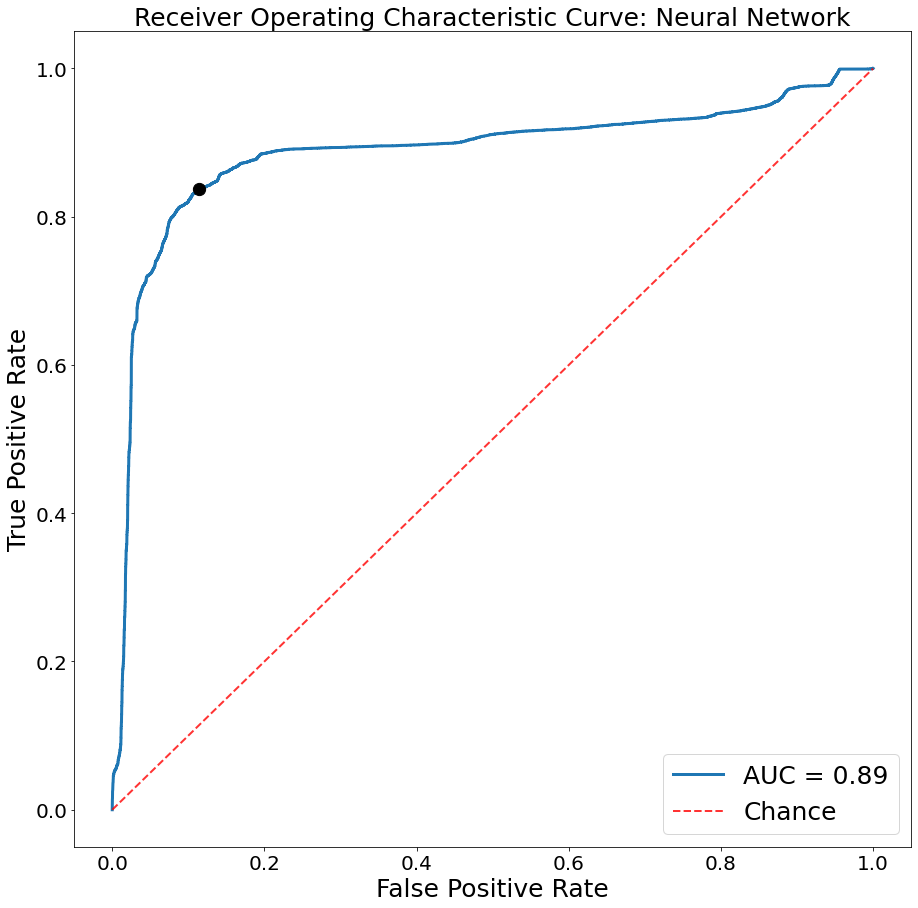

In [64]:
plot_roc(fpr, tpr, title = "Receiver Operating Characteristic Curve: Neural Network")

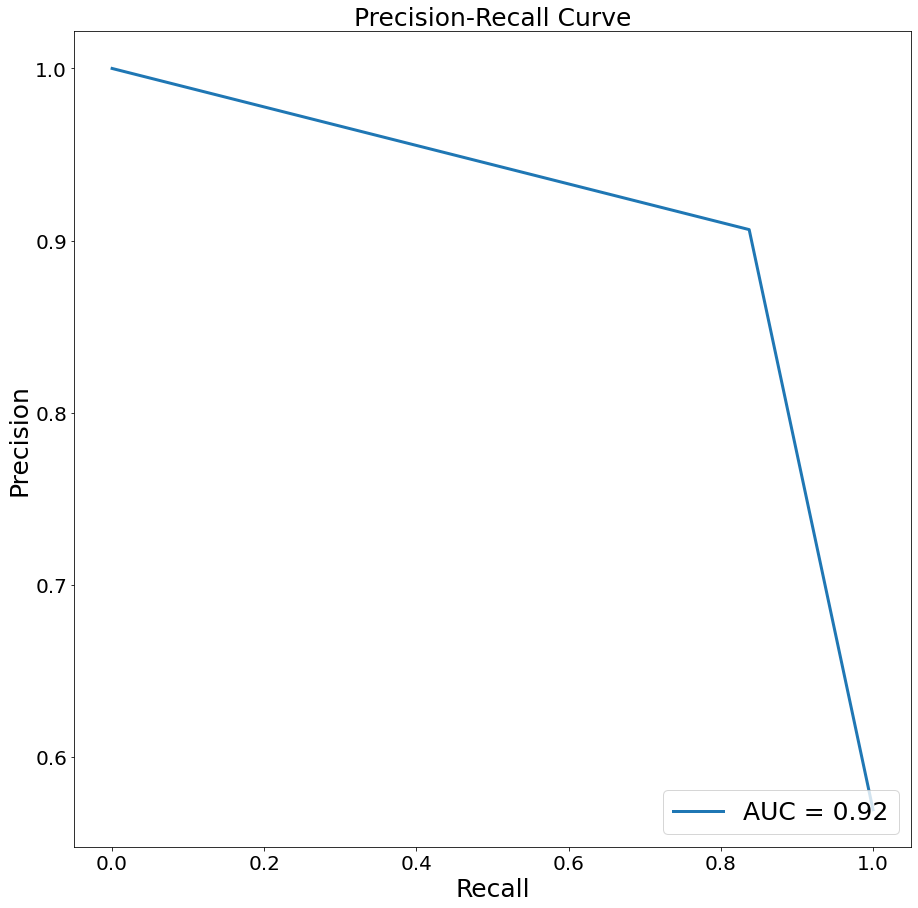

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_binary)
plot_pr(precision, recall)

## Comparing Multiple Models

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)

In [67]:
def fit_train_test_splits_together(
    clf_list, x_train, y_train, x_test, y_test, name_list
):
    plt.figure(figsize=(15, 15))
    mpl.rcParams["xtick.labelsize"] = 10
    mpl.rcParams["ytick.labelsize"] = 10
    
    for index, clf in enumerate(clf_list):
        clf.fit(x_train, y_train)

        # make simple prediction
        y_actual = y_test.copy()
        y_pred = clf.predict_proba(x_test)[:, 1]
        # fprs, tprs, thresholds = plot_roc_curve_better(y_actual, y_pred, title=title)
        fprs, tprs, thresholds = roc_curve(y_actual, y_pred)
        curve_auc = auc(fprs, tprs)
        plt.plot(fprs, tprs, label="" + name_list[index] + ": AUC = %0.2f" % curve_auc)

        # print stats
        op_fpr, op_tpr, op_thresh = get_optimal_threshold(fprs, tprs, thresholds)
        y_pred_binary = get_binary_predictions(y_pred, op_thresh)
        tp, fp, tn, fn = perf_measure(y_actual, y_pred_binary)
        confusion_mat = confusion_matrix(y_actual, y_pred_binary)

        print(name_list[index] + " confusion matrix:")
        print(confusion_mat)
        print("")

    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("ROC Curve", fontsize=20)
    plt.xlabel("False Positive Rate", fontsize=20)
    plt.ylabel("True Positive Rate", fontsize=20)
    plt.show()

def fit_train_test_splits_together_2(
    clf_list, x_train, y_train, x_test, y_test, name_list
):
    plt.figure(figsize=(15, 15))
    for index, clf in enumerate(clf_list):
        clf.fit(x_train, y_train)
        # make simple prediction
        y_actual = y_test.copy()
        y_pred = clf.predict_proba(x_test)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_actual, y_pred)
        curve_auc = auc(recall, precision)
        plt.plot(
            recall, precision, label="" + name_list[index] + ": AUC = %0.2f" % curve_auc
        )
    plt.legend(loc="lower right", fontsize=20)
    plt.title("Precision-Recall Curve", fontsize=20)
    plt.xlabel("Recall", fontsize=20)
    plt.ylabel("Precision", fontsize=20)
    plt.show()

Logistic Regression confusion matrix:
[[7785 1926]
 [3207 9626]]

Logistic Regression w/ L1 Reg confusion matrix:
[[8447 1264]
 [3125 9708]]

Logistic Regression w/ L2 Reg confusion matrix:
[[7720 1991]
 [3145 9688]]

Gaussian NB confusion matrix:
[[ 7480  2231]
 [ 2572 10261]]

ExtraTrees confusion matrix:
[[ 8621  1090]
 [  894 11939]]

AdaBoostClassifier confusion matrix:
[[ 8526  1185]
 [ 1305 11528]]

RandomForest confusion matrix:
[[ 8651  1060]
 [  504 12329]]

XGBoost confusion matrix:
[[ 9115   596]
 [ 1733 11100]]



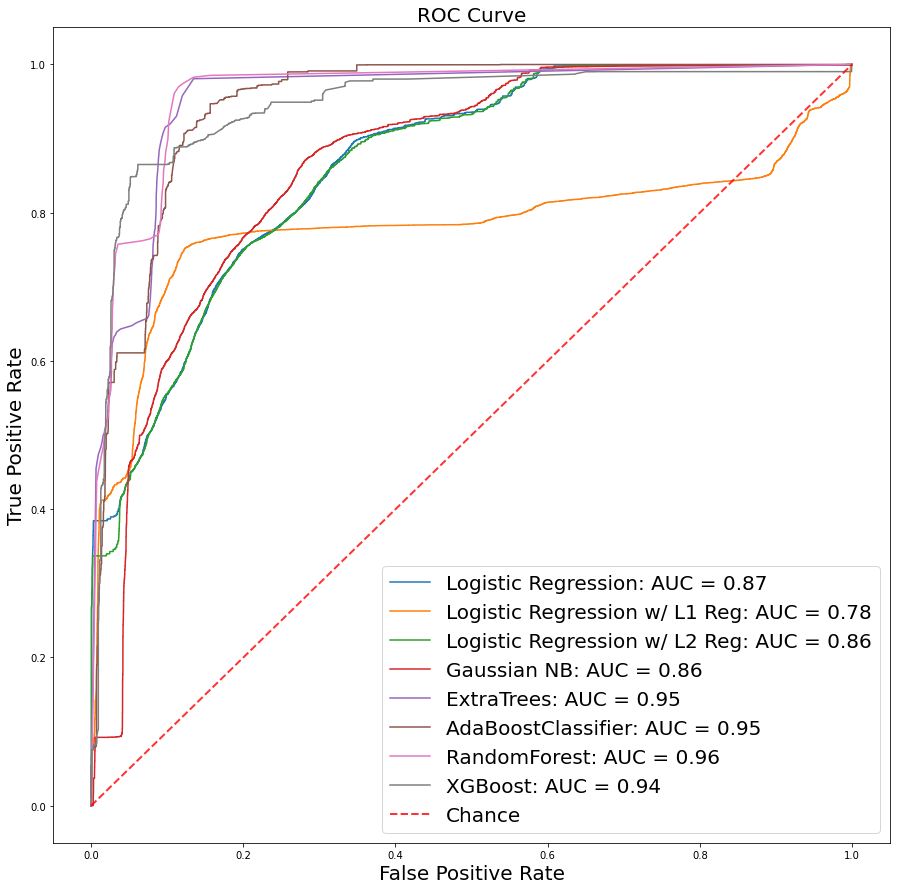

'\nConfusion Matrix:\n\n    TP | FN\n    _______\n    \n    FP | TN\n'

In [68]:
x_train = np.array(df_train)
x_test = np.array(df_test)

# Run cross validation for each model on the unresponsive population
models = [
    LogisticRegression(max_iter=1000),
    LogisticRegression(penalty="l1", solver='liblinear'),
    LogisticRegression(penalty="l2"),
    GaussianNB(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]
names = [
    "Logistic Regression",
    "Logistic Regression w/ L1 Reg",
    "Logistic Regression w/ L2 Reg",
    "Gaussian NB",
    "ExtraTrees",
    "AdaBoostClassifier",
    "RandomForest",
    "XGBoost",
]
fit_train_test_splits_together(
    models, x_train, y_train, x_test, y_test, names
)

'''
Confusion Matrix:

    TP | FN
    _______
    
    FP | TN
'''

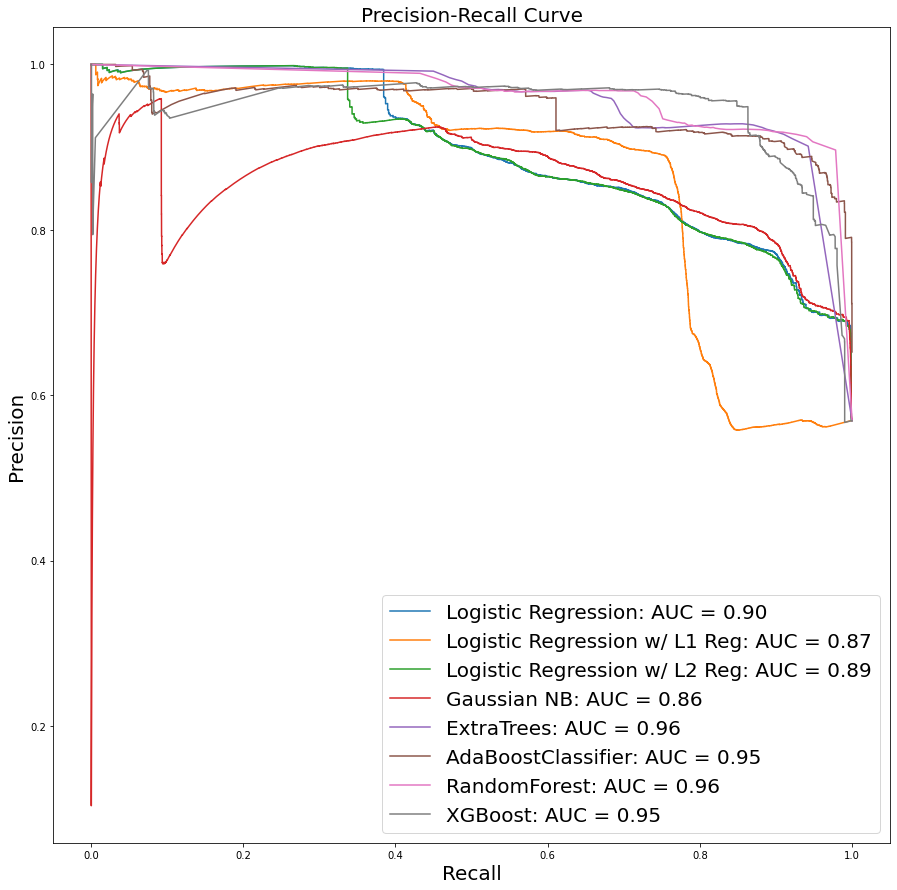

In [69]:
fit_train_test_splits_together_2(
    models, x_train, y_train, x_test, y_test, names
)

## Takeaways
- This is a WONDERFUL dataset for TREE-BASED MODELS (AdaBoostClassifier, RandomForest, XGBoost & ExtraTrees). This is likely because we have so many binary features in our data set, which are optimal for decision trees!

- Note: L1 (LASSO) & L2 (Ridge) regularization did not improve results, with L1 dropping results signficantly. Likely because our featurespace is not extremely large, so harshly manipulating the feature weights added no improvements. 

- Decision trees were #1 (Random Forest specifically), followed by the neural network, then logistic regression (w/o regularization). 